LA5:Data Analytics II

1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score

In [2]:
df=pd.read_csv("social.csv")

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [7]:
reg=LogisticRegression()

In [8]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [9]:
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [10]:
df=pd.DataFrame({'real values':y_test,'predicted values':y_pred})
df

,real values,predicted values
332,0,0
111,0,0
352,1,1
205,0,1
56,0,0
...,...,...
304,0,0
187,0,0
166,0,0
64,0,1


In [11]:
print(accuracy_score(y_test,y_pred))

0.8875


In [12]:
print(precision_score(y_test,y_pred))

0.8518518518518519


In [13]:
print(recall_score(y_test,y_pred))

0.8214285714285714


In [14]:
cm=confusion_matrix(y_test,y_pred)

In [15]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(TN,FN,TP,FP)

48 5 23 4


In [16]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.8875


In [17]:
error=(FP+FN)/(TP+TN+FP+FN)
print(error)

0.1125


In [18]:
precision=TP/(TP+FP)
print(precision)

0.8518518518518519


In [19]:
recall=TP/(TP+FN)
print(recall)

0.8214285714285714


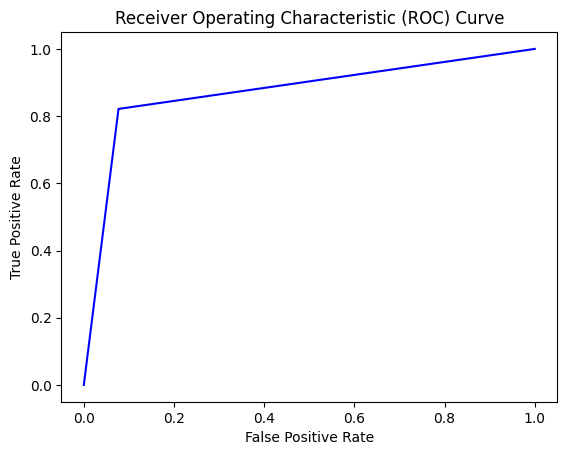

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.show()